3. Resistencia al ruido:

Genere datasets con d = 5, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando el valor de C (overlapping de las clases) de 0.5 a 2.5 con incrementos de 0.5. Como en el punto anterior, para cada valor dado de C cree 20 conjuntos distintos de entrenamiento, pero uno solo de test. Genere una gráfica del test-error en función de C para el problema "paralelo" y el "diagonal" (sólo los promedios de los 20 conjuntos para cada valor de C). También incluya en la gráfica los valores mínimos que se piden en el opcional 6.1 (el que no haga el opcional me los puede pedir a mi). Todos los resultados de los dos problemas y el error mínimo en la misma gráfica. Discuta los resultados.

In [1]:
import numpy as np 
import matplotlib.pylab as plt
import pandas as pd
from distribuciones import diagonal, paralelo
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris 
from sklearn import tree 

In [2]:
d = 5
n_train = 250
n_test  = 10000
C_values = np.linspace(0.5,2.5,5)
trainingsets = 20
print(C_values)

[0.5 1.  1.5 2.  2.5]


# Dist Diagonal

In [3]:
error_training = np.zeros([len(C_values),trainingsets])
error_test = np.zeros([len(C_values),trainingsets])

k = 0 
for C in C_values:
    
    testdiag = diagonal(d,n_test,C)
    
    for i in range(trainingsets):
    
        dtrain = diagonal(d,n_train,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clf.fit(X, y)
        
        prediccion_training = clf.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k,i] = 1 - accuracy
        
        test = testdiag.drop(['clases'],axis = 1).values
        prediccion_test = clf.predict(test)
        correctos, = np.where(prediccion_test == testdiag['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k,i] = 1 - accuracy
        
    k = k + 1

In [4]:
error_mean_training = np.zeros(len(C_values))
for i in range(len(C_values)):
    error_mean_training[i] = np.mean(error_training[i,:])

error_mean_test = np.zeros(len(C_values))
for i in range(len(C_values)):
    error_mean_test[i] = np.mean(error_test[i,:])

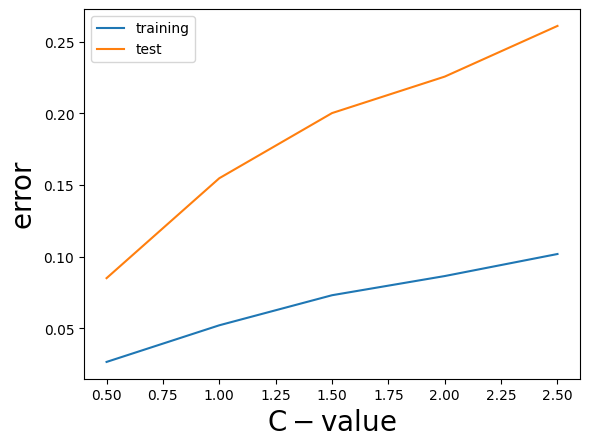

In [5]:
plt.plot(C_values,error_mean_training,label='training')
plt.plot(C_values,error_mean_test,label='test')
plt.xlabel('$\\rm C-value$',size=20)
plt.ylabel('$\\rm error$',size=20)

plt.legend()

3.1 Opcional:
Puede calcular para cada valor de C cuál es el mínimo error que se puede conseguir? Cómo se comparan dichos valores con los obtenidos con el árbol? Obtenga una curva de error mínimo y agréguela a la gráfica anterior. Explique brevemente cómo obtuvo los valores mínimos.
Hay varias maneras de hacerlo. Una simple es imaginando cual es el clasificador ideal o de mínimo error para este problema (a ese clasificador se lo llama "clasificador de Bayes") y midiendo directamente sobre un conjunto de test grande (10000 puntos para d=5) cuántos puntos son mal clasificados por ese clasificador ideal.



In [10]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

error_bayes = np.zeros(len(C_values))

k = 0 
for C in C_values:
    
    testdiag = diagonal(d,n_test,C)
    
    dtrain = diagonal(d,n_train,C)
    y = dtrain['clases'].values
    X = dtrain.drop(['clases'],axis = 1).values
    clf = GaussianNB()
    clf.fit(X,y)
    prediccion_bayes = clf.predict(X)
    
    correctos, = np.where(prediccion_bayes == y)
    accuracy = len(correctos)/len(y)
    error_bayes[k] = 1 - accuracy
        
    k = k + 1

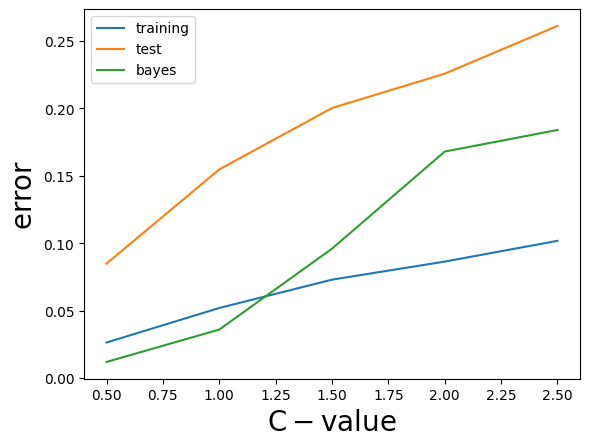

In [11]:
plt.plot(C_values,error_mean_training,label='training')
plt.plot(C_values,error_mean_test,label='test')
plt.plot(C_values,error_bayes,label='bayes')
plt.xlabel('$\\rm C-value$',size=20)
plt.ylabel('$\\rm error$',size=20)

plt.legend()